<a href="https://colab.research.google.com/github/spacemaninSeoul/PythonMachinelearningGuide/blob/main/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C%5D_II_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나이다.

**지도학습**은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측하는 것이다. 즉 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다. 이 때 학습을 위해 주어진 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트라고 말한다.

사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있다.

**sklearn.datasets** 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임이다.

**sklearn.tree** 내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스의 모임이다.

**sklearn.model_selection**은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임이다.

여기서 하이퍼 파라미터란 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭한다.

데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데는 **train_test_split( )** 함수를 사용한다.

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

#붓꽃 데이터 세트를 로딩한다.
iris = load_iris()

#iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('irir target값:', iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다.
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

irir target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


레이블(Label, 결정값)은 0, 1, 2 세 가지 값으로 되어 있으며 0이 Setosa 품종, 1이 versicolor 품종, 2가 virginica 품종을 의미한다.

학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요한데, 따라서 학습용 데이터와 테스트용 데이터 세트가 필요하다.

이를 위해 사이킷런은 **train_test_split( )** API를 제공한다. 이를 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할한다.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

train_test_split( )의 첫 번째 파라미터인 iris_data는 피처 데이터 세트이다. 두 번째 파라미터인 iris_label은 레이블(Label) 데이터 세트이다. test_size=0.2는 전체 데이터 세트 중 테스트 데이터 세트의 비율이다. random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값이다.

이 데이터를 기반으로 머신러닝 분류 알고리즘의 하나인 의사결정 트리를 이용해 학습과 예측을 수행한다.

먼저 사이킷런의 의사 결정 트리 클래스인 **DecisionTreeClassifier**를 객체로 생성한다.

생성된 DecisionTreeClassifier 객체의 **fit( )** 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행한다.

In [17]:
#DecisinoTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

이렇게 학습이 완료되었고, 예측을 수행하도록 한다.

예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 한다. 일반적으로 테스트 데이터 세트를 이용한다.

DecisionTreeClassifier 객체의 predict( ) 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환한다.

In [18]:
#학습이 완료된 DecisinoTreeClassifier 객체에서 테스트 데이터 세트로 예측을 수행한다.
pred = dt_clf.predict(X_test)

예측 결과를 기반으로 DecisionTreeClassifier의 예측 성능을 평가하도록 한다.

여기서는 정확도를 측정한다. **정확도**는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표이다.

사이킷런에선 정확도 측정을 위해 **accuracy_score( )** 함수를 제공한다. accuracy_score( ) 의 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력하면 된다.

In [19]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:  0.9333


붓꽃 데이터 세트로 분류를 예측한 프로세스를 정리하면 다음과 같다.
1. **데이터 세트 분리**: 데이터를 학습 데이터와 테스트 데이터로 분리한다.
2. **모델 학습**: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.
3. **예측 수행**: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측한다.
4. **평가**: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다.

# 2. 사이킷런의 기반 프레임워크 익히기

## 1) Estimator 이해 및 fit( ), predict( ) 메서드

사이킷런은 ML 모델 학습을 위해서 **fit( )**을, 학습된 모델의 예측을 위해 **predict( )** 메서드를 제공한다.

사이킷런에서는 분류 알고리즘을 구현한 클래스를 **Classifier**로, 회귀 알고리즘을 구현한 클래스를 **Regressor**로 지칭한다.

사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공한다. 이들 Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부른다. 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 **Estimator**라고 부른다.

## 2) 사이킷런의 주요 모듈

0. 분류 - 모듈명 : 설명
1. 예제 데이터 - sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
2. 피처 처리
  1. sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
  2. sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
  3. sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨.
3. 피처 처리 & 차원 축소 - sklearn.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능을 수행할 수 있음.
4. 데이터 분리, 검증 & 파라미터 튜닝 - sklearn.model_selection : 교차 검증을 위한 학습용/테스트 용 분리, 그리드 서치(Grid Search)로 최적 파라미터 추출 등의 API 제공
5. 평가 - sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈(Pairwise)에 대한 다양한 성능 측정 방법 제공. Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공
6. ML 알고리즘
  1. sklearn.ensemble : 앙상블 알고리즘 제공. 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공
  2. sklearn.linear_model : 주로 선형 회귀, 릿지(Ridge), 라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. 또한 SGD(Stochastic Gradient Descent) 관련 알고리즘도 제공.
  3. sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공. 가우시안 NB, 다항 분포 NB 등.
  4. sklearn.neighbors : 최근접 이웃 알고리즘 제공. K-NN 등
  5. sklearn.svm : 서포트 벡터 머신 알고리즘 제공
  6. sklearn.tree : 의사 결정 트리 알고리즘 제공
  7. sklearn.cluster : 비지도 클러스터링 알고리즘 제공 (K-평균, 계층형, DBSCAN 등)
7. 유틸리티 - sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공.

## 3) 개별 키가 가리키는 데이터 세트의 의미


*   **data**는 피처 데이터 세트를 가리킨다.
*   **target**은 피처의 데이터 세트를 가리킨다.
* **target_names**는 개별 레이블의 이름을 나타낸다.
* **feature_names**는 피처의 이름을 나타낸다.
* **DESCR**은 데이터 세트에 대한 설명과 각 피처의 설명을 나타낸다.


In [20]:
from sklearn.datasets import load_iris

iris_data = load_iris()

keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


데이터 키는 피처들의 데이터 값을 가리킨다. 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터 값을 추출하기 위해서는 데이터 세트.data(또는 데이터 세트['data'])를 이용하면 된다.

In [21]:
print('\n feature_names 의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 tpye:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:', type(iris_data.target))
print('target 의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 tpye: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5

# 3. Model Selection 모듈 소개

## 1) 학습/테스트 데이터 세트 분리 - train_test_split( )

과적합의 우려 때문에 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 한다. 사이킷런의 **train_test_split( )**을 통해 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 쉽게 분리할 수 있다.

먼저 sklearn.model_selection 모듈에서 train_test_split 을 로드 한다. train_test_split( )는 **첫 번째 파라미터로 피처 데이터 세트**, **두 번째 파라미터로 레이블 데이터 세트**를 입력받는다. 그리고 선택적으로 다음 파라미터를 입력 받는다.



*   **test_size**: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. 디폴트는 0.25, 즉 25%이다.
*   **train_size**: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. test_size parameter를 통상적으로 사용하기 때문에 train_size는 잘 사용되지 않는다.
* **shuffle**: 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정한다. 디폴트는 True이다. 데이터를 분산시켜 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용된다.
* **random_state**: random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값이다. train_test_split( )는 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 생성한다.

train_test_split( )의 반환값을 튜플 형태이다. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환된다.




In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=121)

In [23]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


## 2) 교차 검증

알고리즘을 학습시키는 학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하다. 하지만 이 방법 역시 과적합(Overfitting)에 취약한 약점을 가질 수 있다. **과적합**은 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 수 있는 경우에는 예측 성능이 과도하게 떨어지는 것을 말한다.

**교차 검증**은 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 즉 학습 데이터를 다시 분할하여 학습 데이터와 학습된 모델의 성능을 일차 평가하는 데 사용한다.

### (1) K 폴드 교차 검증

**K 폴드 교차 검증**은 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.

5 폴드 교차 검증일 경우(즉, K가 5) 5개이 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가한다. 그 후 5개(K개)의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영하면 된다.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


생성된 KFold 객체의 split( ) 을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리한다. 전체 붓꽃 데이터는 150개이기에, 학습용 데이터 세트는 이 중 4/5인 120개, 검증 데이터 세트는 1/5인 30개로 분할된다.

KFold( ) 객체는 **splt( )**을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환한다.

In [25]:
n_iter = 0

# KFold 객체의 split( ) 를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split( )으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  
  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  #반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


### (2) Stratified K 폴드 (stratify 계층화하다)

**Stratified K 폴드**는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식이다.

데이터가 크게 비대칭한 분포를 보이는 경우, 원본 데이터와 유사한 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요하다.

Stratified K 폴드는 이처럼 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 준다. 이를 위해 **Stratified K 폴드**는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

In [26]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [27]:
# 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인한다.
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts(), '\n')

## 교차검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64 

## 교차검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64 

## 교차검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64 



**StratifiedKFold**는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 준다.

KFold와의 사용 상의 차이는 StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split( ) 메서드에 인자로 피처 데이터뿐만 아니라 레이블 데이터 세트도 반드시 필요하다는 사실이다.

In [28]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train= iris_df['label'].iloc[train_index]
  label_test= iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts(), '\n')

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64 

## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64 

## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64 



In [29]:
#StratifiedKFold를 이용해 붓꽃 데이터를 교차 검증

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split( )으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]

  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계싼
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 한다.

### (3) 교차 검증을 보다 간편하게 - cross_val_score( )

KFold로 데이터를 학습하고 예측하는 코드를 보면 먼저 (1)폴드 세트를 설정하고, (2)for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 (3) 반복적으로 학습과 예측을 수행하고 예측 성능을 반환했다.

**cross_val_score( )**은 이런 일련의 과정을 한꺼번에 수행해주는 API이다. 다음은 cross_val_score( ) API의 선언 형태이다.

cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs)
이 중 estimator, X, y, scoring, cv가 주요 파라미터이다.

**estimator**는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미.
**X**는 피처 데이터 세트
**y**는 레이블 데이터 세트
**scoring**은 예측 성능 평가 지표
**cv**는 교차 검증 폴드 수

**cross_val_score( )**는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할합니다(회귀인 경우는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다).

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


cross_val_score( )는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환한다.

## 3) GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다.

사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.

In [31]:
grid_parameters = {'max_depth': [1, 2, 3],
                   'min_samples_split': [2, 3]}

**GridSearchCV**는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 즉, 데이터 세트를 cross-validation을 위한 학습/데이터 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다.

GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터는 다음과 같다.
* **estimator**: classifier, regressor, pipeline이 사용될 수 있다.
* **param_grid**: key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.
* **scoring**: 예측 성능을 측정할 평가 방법을 지정한다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예: 정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있다.
* **cv**: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정한다.
* **refit**: 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

간단한 예제를 통해 GridSearchCV API의 사용법을 익히도록 한다.

train_test_split( )을 이용해 학습 데이터와 테스트 데이터를 먼저 분리하고, 학습 데이터에서 GridSearchCV를 이용해 최적 하이퍼 파라미터를 추출한다. 결정 트리 알고리즘을 구현한 DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 변화시키면서 최적화를 진행한다.

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

## 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2, 3]}

GridSearchCV 객체의 fit(학습 데이터 세트) 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_gid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results 속성에 기록한다.

In [33]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default. True이면 가장 좋은 파라미터 설정으로 재학습시킨다.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_gid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


위는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 나타낸다.

주요 칼럼별 의미는 다음과 같다.
* params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타낸다.
* rank_test_score는 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타낸다.
* mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다.

GridSearchCV 객체의 fit( )을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록된다(즉, cv_results_의 rank_test_score가 1일 때의 값).

In [34]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트이다. refit=True이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장한다.

In [35]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없다
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.

# 4. 데이터 전처리

결손값, 즉 NaN, Null 값은 허용되지 않는다. 따라서 이러한 Null 값은 고정된 다른 값으로 변환해야 한다.

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 따라서 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다.

## 1) 데이터 인코딩

머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot encoding)이 있다.

### (1) 레이블 인코딩

**레이블 인코딩**은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다. 예를 들어 상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서 값으로 돼 있다면 TV:1, 냉장고:2, 전자레인지:3, 컴퓨터:4, 선풍기:5, 믹서:6과 같은 숫자형 값으로 변환하는 것이다.

사이킷런의 레이블 인코딩은 **LabelEncoder** 클래스로 구현한다. LabelEncoder를 객체로 생성한 후 fit( )과 transform( )을 호출해 레이블 인코딩을 수행한다.

In [37]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서']

# LabelEncoder를 객체로 생성한 후, fit( )과 transform( )으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 2]


문자열 값이 어떤 숫자 값으로 인코딩됐는지 확인하기 위해서는 LabelEncoder 객체의 **classes_** 속성값으로 확인하면 된다.

In [38]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


**inverse_transform( )**을 통해 인코딩된 값을 다시 디코딩할 수 있다.

In [39]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다.

레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다. 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없다.

### (2) 원-핫 인코딩(One-Hot Encoding)

**원-핫 인코딩**은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다. 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.

해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력한다.

원-핫 인코딩은 사이킷런에서 **OneHotEncoder** 클래스로 쉽게 변환이 가능하다. 단, 주의할 점이 있다. 첫 번째로 OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다. 두 번째로 입력 값으로 2차원 데이터가 필요하다.

In [40]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환한다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환한다.
labels = labels.reshape(-1, 1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


 판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다. **get_dummies( )**를 이용하면 된다. 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있다.

In [41]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 2) 피처 스케일링과 정규화

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 **피처 스케일링(feature scaling)**이라고 한다. 대표적인 방법으로 표준화(Standaradization)와 정규화(Normalization)가 있다.

**표준화**는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다. 표준화를 통해 변환될 피처 x의 새로운 i번째 데이터를 xi_new라고 한다면 이 값은 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산할 수 있다.

> xi_new = xi - mean(x) / stdev(x)



**정규화**는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 즉, 개별 데이터의 크기를 모두 같은 단위로 변경하는 것을 말한다.

새로운 데이터 xi_new는 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값으로 변환할 수 있다.

> xi_new = xi - min(x) / max(x) - min(x)

그런데 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있다(그래도 큰 개념은 동일). 사이킷런의 Normalizer 모듈은 선형대수에서 정규화 개념이 적용됐으며, 개별 벡터 크기를 맞추기 위해 변환하는 것을 의미. 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠준다. 세 개의 피처 x, y, z가 있다고 하면 새로운 데이터 xi_new는 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠준다.

> xi_new = xi / √(xi^2 + yi^2 + zi^2)

혼선을 방지하기 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링이라 통칭하고, 선형대수 개념의 정규하를 벡터 정규화로 지칭하도록 한다.

## 3) StandardScaler

사이킷런에서 제공하는 대표적인 피처 스케일링 클래스인 **StandardScaler**는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해준다.

In [43]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환한다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


**StandardScaler**를 이용해 각 피처를 한 번에 표준화해 변환하기 위해서는, StandardScaler 객체를 생성한 후 fit( )과 transform( ) 메서드에 변환 대상 피처 데이터 세트를 입력하고 호추랗면 된다.

transform( )을 호출 할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값과 분산 값을 다시 확인해 보도록 한다.

In [44]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 세트 변환. fit( )과 transform( ) 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( ) 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## 4) MinMaxScaler

**MinMaxScaler**는 데이터값을 0과 1사이의 범위 값으로 변환한다(음수 값이 있으면 -1에서 1값으로 변환한다). 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max scale을 적용해 볼 수 있다.

In [45]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit( )과 transform( ) 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform( ) 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('feature 들의 최댓값')
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 5) 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

일반적으로 fit( )은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용하며 transform( )은 이렇게 설정된 정보를 이용해 데이터를 변환합니다. 그리고 fit_transform( )은 fit( )과 transform( )을 한번에 적용하는 기능을 수행한다.

그런데 학습 데이터 세트와 테스트 데이터 세트에 이 fit( )과 transform( )을 적용할 때 주의가 필요하다. Scaler 객체를 이용해 학습 데이터 세트로 fit( )과 transform( )을 적용하면 테스트 데이터 세트로는 다시 fit( )을 수행하지 않고 학습 데이터 세트로 fit( )을 수행한 결과를 이용해 transform( ) 변환을 적용해야 한다는 것이다.

즉 학습 데이터로 fit( )이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다. 따라서 테스트 데이터에 다시 fit( )을 적용해선 안 되며 학습 데이터로 이미 fit( )이 적용된 Scaler 객체를 이용해 transform( )으로 변환해야 한다.

이는 fit_transform( )을 적용할 때도 마찬가지이다. fit_transform( )은 fit( )과 transform( )을 순차적으로 수행하는 메소드이므로 학습 데이터에서는 상관없지만 테스트 데이터에서는 절대 사용해선 안 된다. 이렇게 학습과 테스트 데이터에 fit( )과 transform( )을 적용할 때 주의 사항이 발생하므로 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일리을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직하다.

요약하자면,


*   가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
*   1이 여의치 않다면 테스트 데이터 변환 시에는 fit( )이나 fit_transform( )을 적용하지 않고 학습 데이터로 이미 fit( )된 Scaler 객체를 이용해 transform( )으로 변환.



# 5. 사이킷런으로 수행하는 타이타닉 생존자 예측


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 먼저 판다스 read_csv()를 이용해 DataFrame으로 로딩
titanic_df = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [67]:
# info() 메서드를 통해 로딩된 데이터 칼럼 타입을 확인
print('### 학습 데이터 정보 ### \n')
print(titanic_df.info())

### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [68]:
# 사이킷 런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 함.
# fillna() 함수를 이용해 간단하게 Null 값을 평균 또는 고정 값으로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수:', titanic_df.isnull().sum())

데이터 세트 Null 값 개수: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [69]:
#문자열 피처들의 값 분류를 살펴본다
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts)

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
              ... 
C110             1
B38              1
E58              1
C86              1
B69              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 <bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>


In [70]:
# Cabin 속성이 정리되지 않은 것으로 보이기 때문에 Cabin 속성의 경우 앞 문자만 추출한다.
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(10))

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object


머신러닝 알고리즘을 적용해 예측을 수행하기 전에 데이터를 먼저 탐색하도록 한다.

첫 번째로 어떤 유형의 승객이 생존 확률이 높았는지 확인하도록 한다.

먼저 성별에 따른 생존자 수를 비교한다.

In [72]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

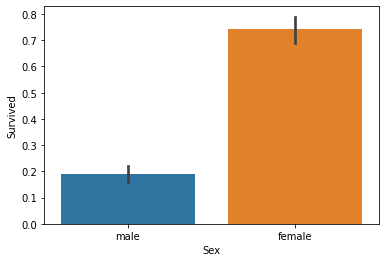

In [73]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

객실 등급별 생존 확률을 확인한다

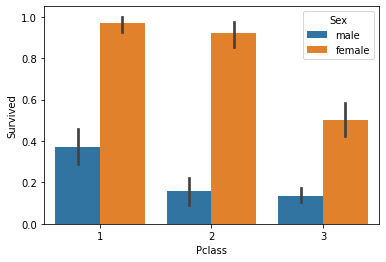

In [74]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

나이에 따른 생존 확률을 알아보도록 한다.

Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당하도록 한다.

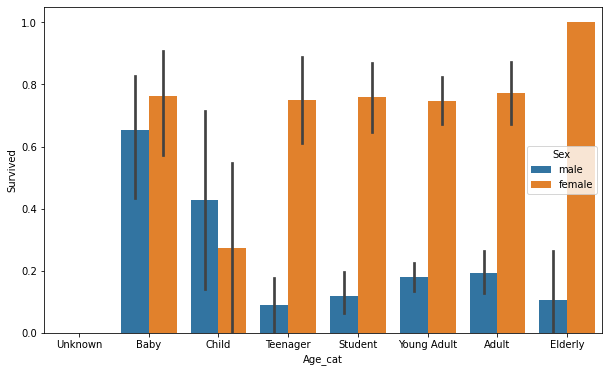

In [76]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에서 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

이제까지 분석 결과 Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임을 확인할 수 있었다.

이제 남아있는 문자열 카테고리를 숫자형 카테고리 피처로 변환하도록 한다.

인코딩은 LabelEncoder 클래스를 이용한다. LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수-1)까지의 숫자 값으로 변환한다.

In [77]:
from sklearn import preprocessing

# 여러 칼럼을 encode_features() 함수를 생성하여 한 번에 변환하도록 한다.
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것을 알 수 있다.

지금까찌 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만든다.
데이터의 전처리를 전체적으로 호출하는 함수는 transform_features( )이며 Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성하였다.

In [79]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [80]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [81]:
# 내려받은 학습 데이터 세트를 기반으로 해서 train_test_split( ) API를 이용해 별도의 테스트 데이터 세트를 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측하도록 한다.